In [1]:
import pickle
from scipy import stats
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def get_rejectionProportion(graphspace_folder):
    num_rejections = 0
    num_count = 0

    Allfiles = os.listdir("../../Output/All8NetworkStatisticsAtConvergence/" + graphspace_folder)
        
    for f in Allfiles:
        if f == ".ipynb_checkpoints":
            pass
        else:
            pickleFile = "../../Output/All8NetworkStatisticsAtConvergence/" + graphspace_folder + "/" + f
            pickle_in = open(pickleFile,"rb")
            savedList = pickle.load(pickle_in)
            pval = savedList[2][4]
            num_count += 1
            if pval < 0.05:
                num_rejections += 1
            
    return num_rejections/num_count*100

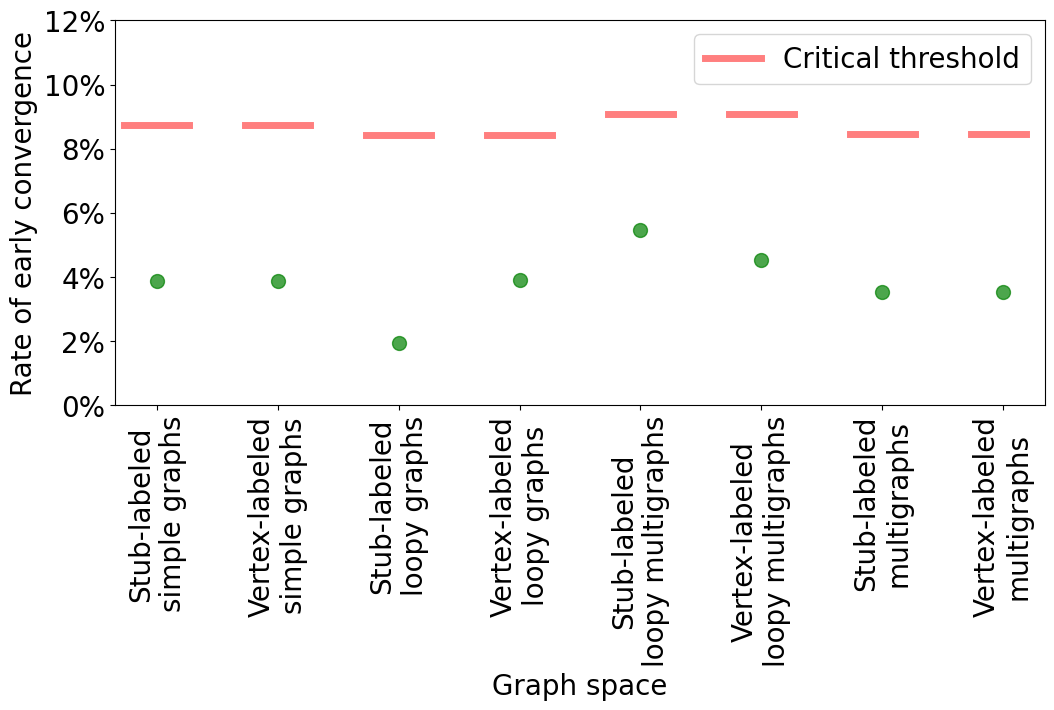

In [3]:
spaces = ["SimpleStub/", "SimpleVertex/", "LoopyOnlyStub/", "LoopyOnlyVertex/", "MultiLoopyStub/",
          "MultiLoopyVertex/", "MultiOnlyStub/", "MultiOnlyVertex/"]

DFGLS_rejection = []
for space in spaces:
    rejection = get_rejectionProportion(space)
    DFGLS_rejection.append(rejection)
    
plt.figure(figsize=(12, 5))

spaces = [i for i in range(0, 16, 2)]

plt.axhline(8.73, xmin = 0.01, xmax = 0.08, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.73, xmin = 0.14, xmax = 0.21, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.44, xmin = 0.27, xmax = 0.34, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.44, xmin = 0.40, xmax = 0.47, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(9.09, xmin = 0.53, xmax = 0.60, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(9.09, xmin = 0.66, xmax = 0.73, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.45, xmin = 0.79, xmax = 0.86, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.45, xmin = 0.92, xmax = 0.98, color='r', lw = 5, ls = "-", alpha = 0.5, label = "Critical threshold")

plt.errorbar(spaces, DFGLS_rejection, linestyle='None', marker='o', markersize = 10, capsize = 5, c = 'g', alpha = 0.7)
plt.xticks(rotation="vertical", fontsize = 20)

plt.xlabel("Graph space", fontsize = 20, color = "black")
plt.ylabel("Rate of early convergence", fontsize = 20, color = "black")

real_ticks = [0, 2, 4, 6, 8, 10, 12] #, 20]
tick_names = ["0%", "2%", "4%", "6%", "8%", "10%", "12%"] #, "15%"] #, "20%"]
plt.yticks(real_ticks, tick_names)
plt.yticks(fontsize = 20)

spaces_text = ["Stub-labeled\nsimple graphs", "Vertex-labeled\nsimple graphs", "Stub-labeled\nloopy graphs", 
          "Vertex-labeled\nloopy graphs", "Stub-labeled\nloopy multigraphs", "Vertex-labeled\nloopy multigraphs",
         "Stub-labeled\nmultigraphs", "Vertex-labeled\nmultigraphs"]

plt.xticks(spaces, spaces_text)
plt.legend(fontsize = 20, loc = "upper right")
plt.show()